# 00 Dataset Overview
A notebook to inspect the recorded datasets for the ppti project and to find useful data for further experiments.

## Imports

In [2]:
import os
import numpy as np

import bagpy
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('fivethirtyeight')

## Read and subset Datasets
Only datasets recorded with the 'wobble' method should be used.

In [4]:
bag_files = os.listdir('Dataset')
readers = []
for f in bag_files:
    if f.endswith('_wobble.bag'):
        readers.append(bagreader('Dataset/'+ f))

[INFO]  Data folder Dataset/2021-11-26-20-01-52_wobble already exists. Not creating.
[INFO]  Data folder Dataset/2021-11-26-20-05-14_wobble already exists. Not creating.
[INFO]  Data folder Dataset/2021-11-26-20-14-48_wobble already exists. Not creating.
[INFO]  Data folder Dataset/2022-01-13-17-18-38_wobble already exists. Not creating.
[INFO]  Data folder Dataset/2022-01-13-17-34-38_wobble already exists. Not creating.
[INFO]  Data folder Dataset/2022-01-13-17-48-10_wobble already exists. Not creating.
[INFO]  Data folder Dataset/2022-01-13-18-02-22_wobble already exists. Not creating.
[INFO]  Data folder Dataset/2022-01-20-15-23-37_wobble already exists. Not creating.
[INFO]  Data folder Dataset/2022-01-20-15-38-51_wobble already exists. Not creating.


Show all possible topics. We will prob only be interested in */imu/imu* or */tum/lmt/joints_goal*

In [5]:
readers[0].topic_table

,Topics,Types,Message Count,Frequency
0,/imu/imu,sensor_msgs/Imu,20175,115.802372
1,/imu/temperature,sensor_msgs/Temperature,20256,115.606075
2,/rosout,rosgraph_msgs/Log,4,47662.545455
3,/tum/lmt/joints_goal,sensor_msgs/JointState,20324,116.224341
4,/tum/lmt/joints_status,sensor_msgs/JointState,56949,323.609598


### IMU Data
Investigate recorded IMU data.

In [7]:
imu = readers[0].message_by_topic('/imu/imu')
df_imu = pd.read_csv(imu)
df_imu.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,orientation.x,orientation.y,orientation.z,orientation.w,orientation_covariance_0,...,linear_acceleration.z,linear_acceleration_covariance_0,linear_acceleration_covariance_1,linear_acceleration_covariance_2,linear_acceleration_covariance_3,linear_acceleration_covariance_4,linear_acceleration_covariance_5,linear_acceleration_covariance_6,linear_acceleration_covariance_7,linear_acceleration_covariance_8
0,1.637953e+09,17783,1517155276,844995975,imu_link,-0.003540,0.020447,0.901917,0.431458,0.0,...,992.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.637953e+09,17784,1517155276,852454900,imu_link,-0.003540,0.020447,0.901917,0.431458,0.0,...,986.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.637953e+09,17785,1517155276,864989995,imu_link,-0.003601,0.020508,0.901733,0.431824,0.0,...,963.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.637953e+09,17786,1517155276,876106023,imu_link,-0.003845,0.020630,0.901611,0.432007,0.0,...,951.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.637953e+09,17788,1517155276,896689891,imu_link,-0.004272,0.021179,0.901428,0.432434,0.0,...,963.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


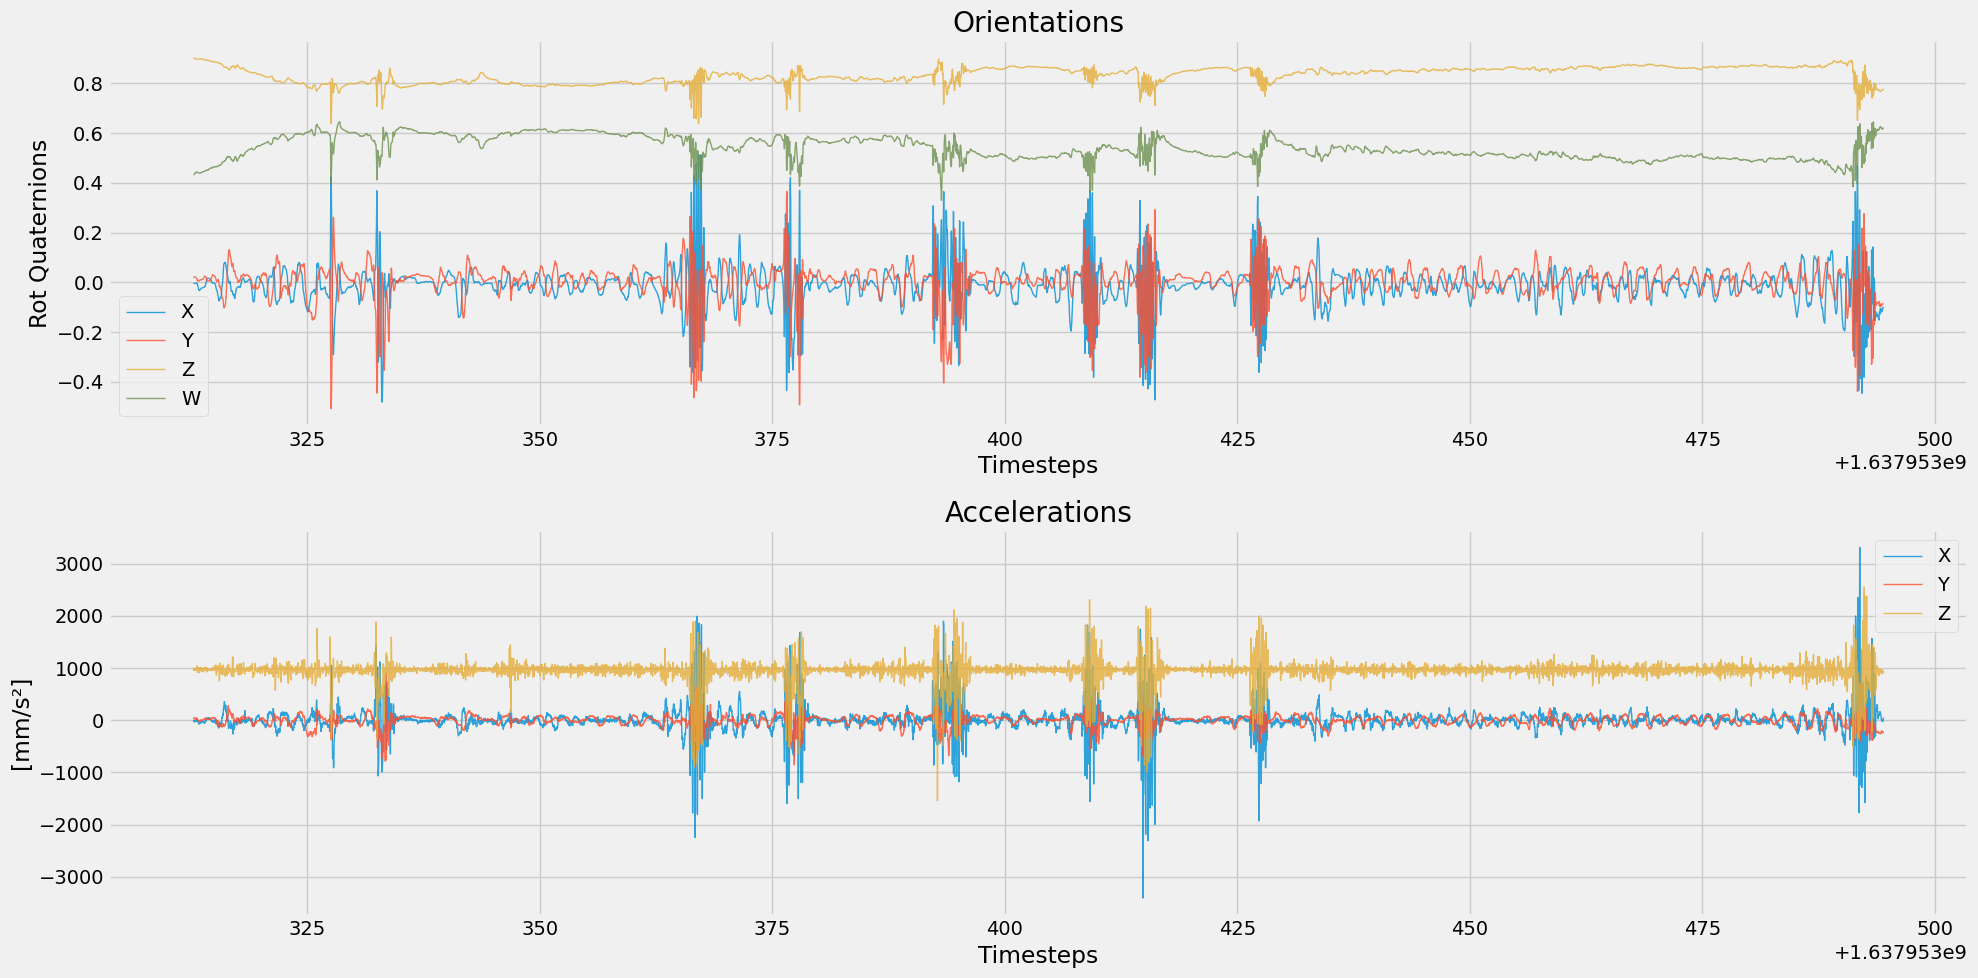

In [14]:
al = .8
f,(ax1,ax2) = plt.subplots(2,1)
ax1.plot(df_imu['Time'],df_imu['orientation.x'], alpha=al, label ='X', linewidth=1)
ax1.plot(df_imu['Time'],df_imu['orientation.y'], alpha=al, label ='Y', linewidth=1)
ax1.plot(df_imu['Time'],df_imu['orientation.z'], alpha=al, label ='Z', linewidth=1)
ax1.plot(df_imu['Time'],df_imu['orientation.w'], alpha=al, label ='W', linewidth=1)
ax1.legend()
ax1.set_xlabel('Timesteps')
ax1.set_ylabel('Rot Quaternions')
ax1.set_title('Orientations')
ax2.plot(df_imu['Time'],df_imu['linear_acceleration.x'], alpha=al, label ='X', linewidth=1)
ax2.plot(df_imu['Time'],df_imu['linear_acceleration.y'], alpha=al, label ='Y', linewidth=1)
ax2.plot(df_imu['Time'],df_imu['linear_acceleration.z'], alpha=al, label ='Z', linewidth=1)
ax2.legend()
ax2.set_xlabel('Timesteps')
ax2.set_ylabel('[mm/s²]')
ax2.set_title('Accelerations')
plt.tight_layout()

### Motor & Joint Data 
Investigate Motor & Joint data.
- __joints_goal__: Goal position for motors
- __joints_status__: Actual true position

In [16]:
joints_goal = readers[0].message_by_topic('/tum/lmt/joints_goal')
df_joints_goal = pd.read_csv(joints_goal)
joints_status = readers[0].message_by_topic('/tum/lmt/joints_status')
df_joints_status   = pd.read_csv(joints_status)
df_joints_goal.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,name,position_0,position_1,velocity_0,velocity_1,effort_0,effort_1
0,1.637953e+09,19745,1637953312,718408107,NaN,"['joint-1', 'joint-2']",-0.015669,-0.010970,1023.0,1023.0,1.0,1.0
1,1.637953e+09,19746,1637953312,726708889,NaN,"['joint-1', 'joint-2']",-0.016084,-0.011235,1023.0,1023.0,1.0,1.0
2,1.637953e+09,19747,1637953312,745891094,NaN,"['joint-1', 'joint-2']",-0.016666,-0.011856,1023.0,1023.0,1.0,1.0
3,1.637953e+09,19748,1637953312,765526056,NaN,"['joint-1', 'joint-2']",-0.016921,-0.012015,1023.0,1023.0,1.0,1.0
4,1.637953e+09,19749,1637953312,776402950,NaN,"['joint-1', 'joint-2']",-0.016921,-0.012015,1023.0,1023.0,1.0,1.0


In [16]:
df_joints_status.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,name,position_0,position_1,velocity_0,velocity_1,effort_0,effort_1
0,1.637953e+09,11541,1517155786,133377075,NaN,"['joint-1', 'joint-2']",-0.012271,-0.009203,0.0,0.0,176283.77,0.00
1,1.637953e+09,11542,1517155786,137187957,NaN,"['joint-1', 'joint-2']",-0.013804,-0.009203,0.0,0.0,176283.77,176289.15
2,1.637953e+09,11543,1517155786,140028953,NaN,"['joint-1', 'joint-2']",-0.013804,-0.009203,0.0,0.0,176283.77,176289.15
3,1.637953e+09,11544,1517155786,143398046,NaN,"['joint-1', 'joint-2']",-0.013804,-0.009203,0.0,0.0,176283.77,176289.15
4,1.637953e+09,11545,1517155786,146441936,NaN,"['joint-1', 'joint-2']",-0.012271,-0.009203,0.0,0.0,176281.08,176289.15


Text(0, 0.5, 'Angle')

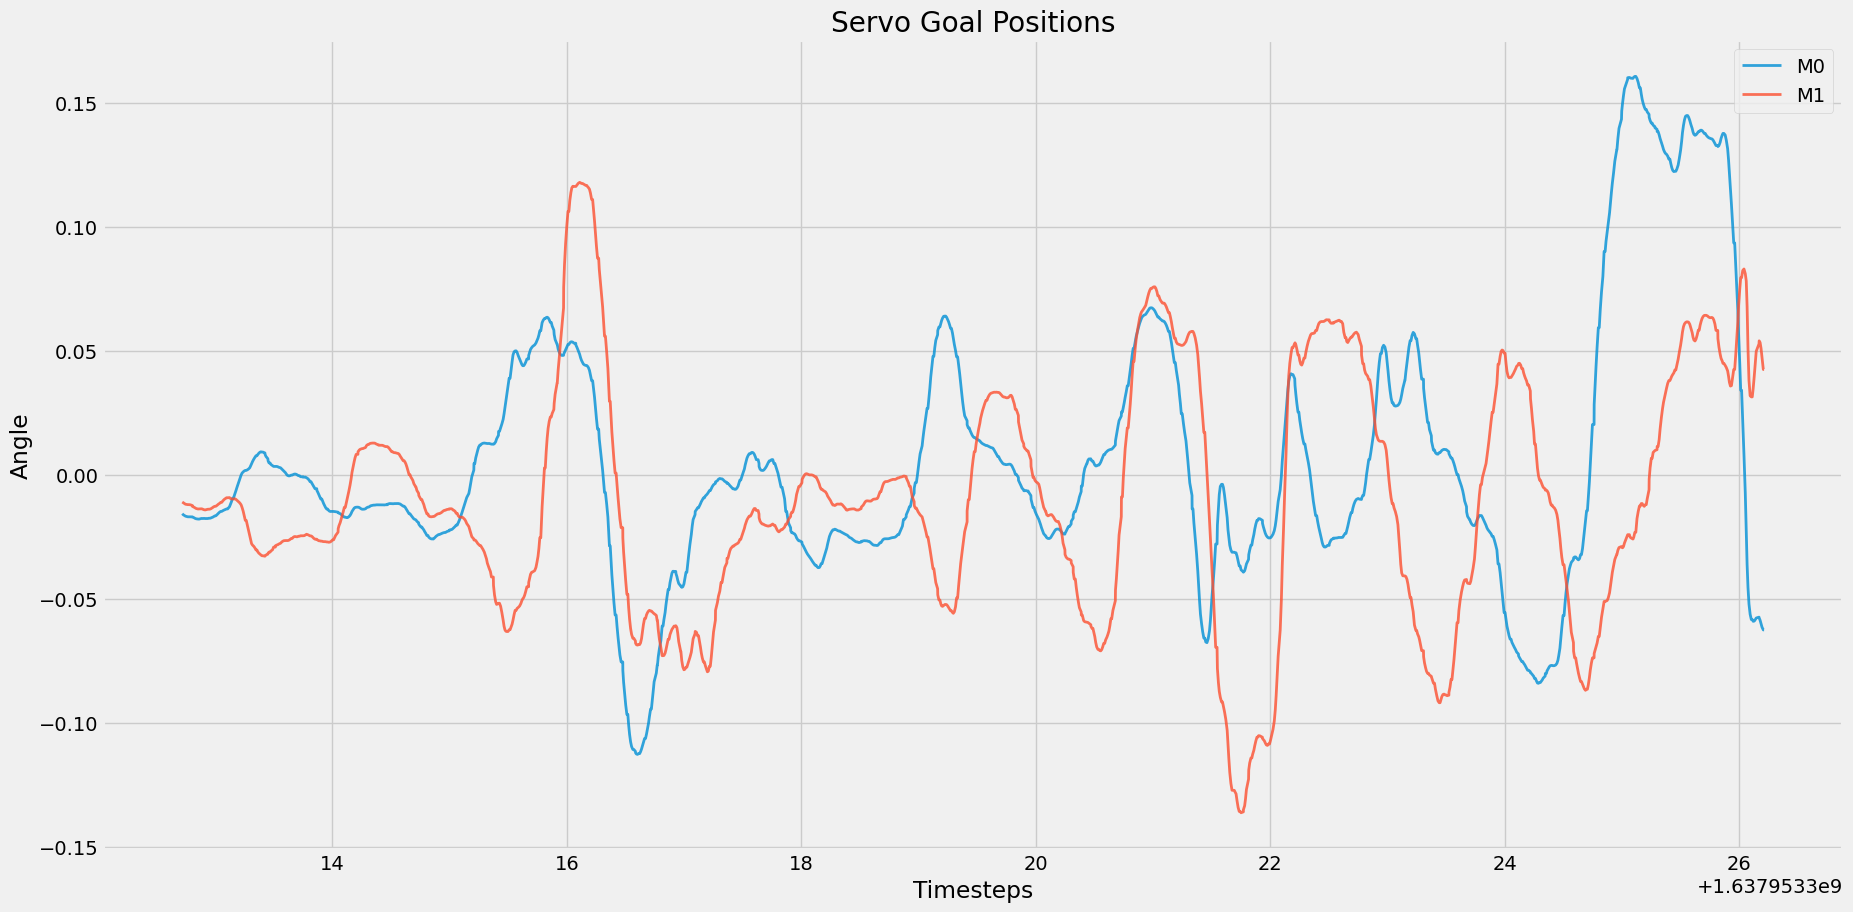

In [19]:
# Plot Servo Goal positions for a given timeframe
al = .8
end = 1500
plt.plot(df_joints_goal['Time'][:end],df_joints_goal['position_0'][:end], alpha=al, label ='M0', linewidth=2)
plt.plot(df_joints_goal['Time'][:end],df_joints_goal['position_1'][:end], alpha=al, label ='M1', linewidth=2)
#plt.plot(df_imu['Time'][:end],df_imu['orientation.x'][:end]+.2, alpha=al, label ='IMU Rotation X', linewidth=2)
#plt.plot(df_imu['Time'][:end],df_imu['orientation.y'][:end]+.2, alpha=al, label ='IMU RotationY', linewidth=2)
plt.legend()
plt.title('Servo Goal Positions');
plt.xlabel('Timesteps')
plt.ylabel('Angle')

#### Comparison Motor joint values vs IMU data

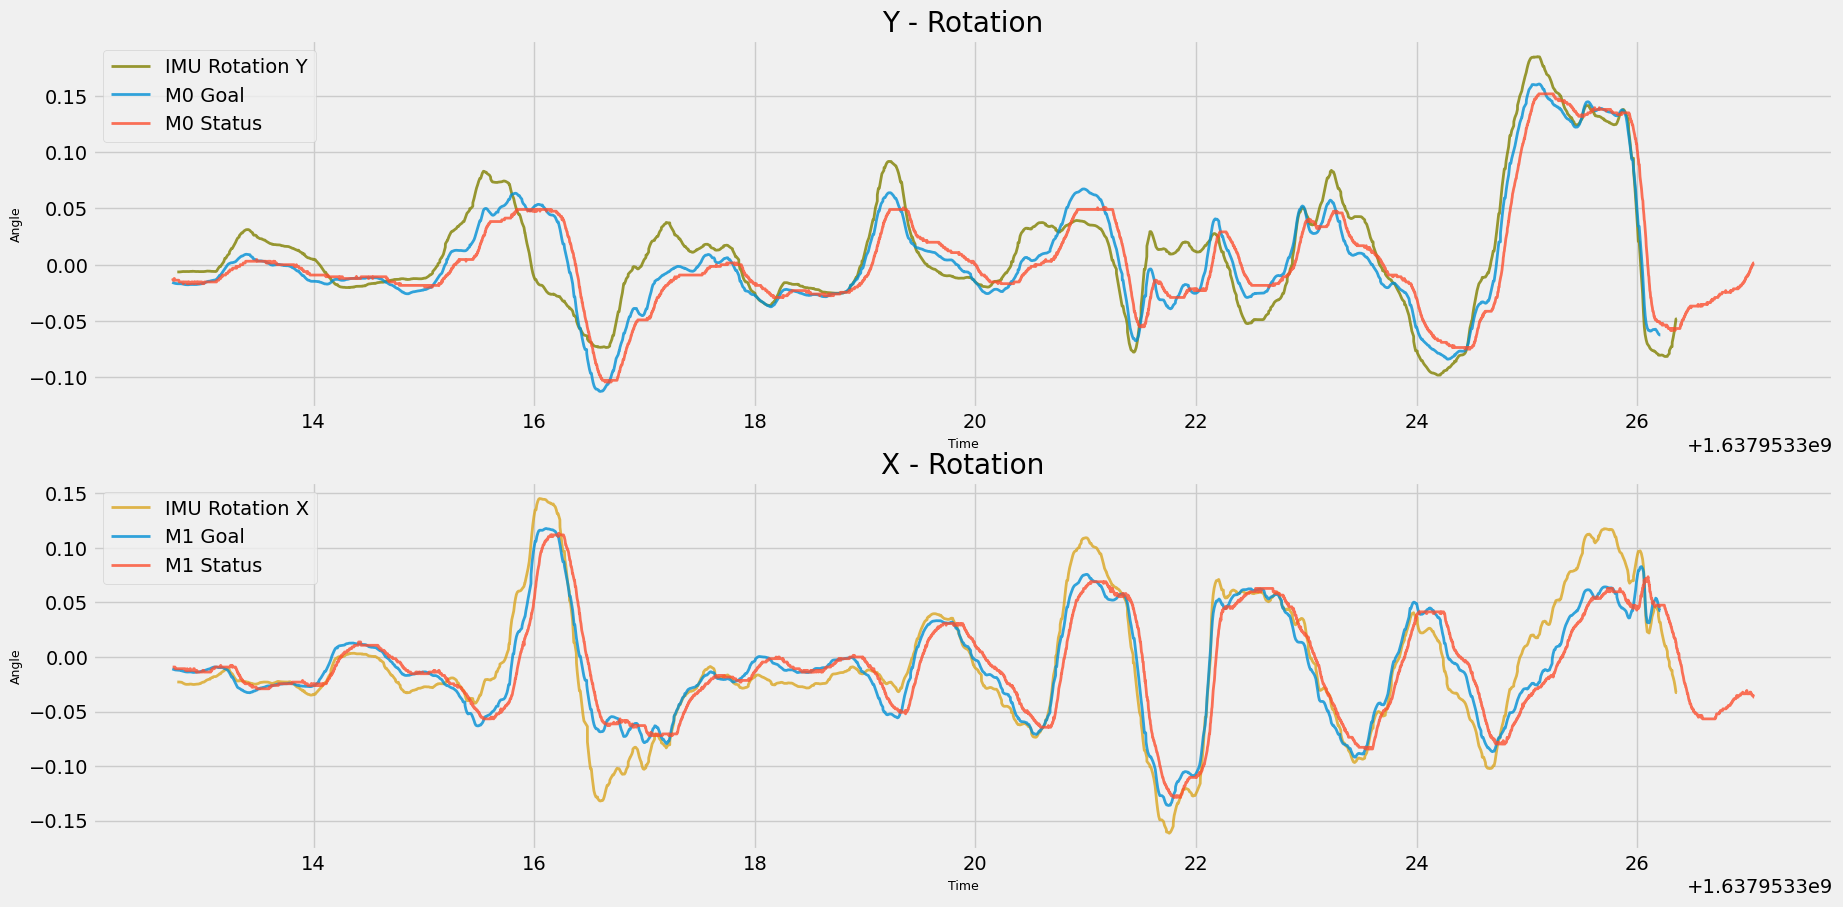

In [29]:
from scipy.spatial.transform import Rotation as R

al = .8
end = 1500
# Tranfsorm from quaternions to Euler Angles
x=df_imu['orientation.x'][:end]
y=df_imu['orientation.y'][:end]
z=df_imu['orientation.z'][:end]
w=df_imu['orientation.w'][:end]
Roll=[]
Pitch=[]
for i in range(0,end):
    r= R.from_quat([x[i],y[i],z[i],w[i]])
    [yaw,pitch,roll]=r.as_euler('zyx', degrees=True)
    Roll.append(roll/100)
    Pitch.append(-pitch/100)

# Plot 1 X
f,(ax1,ax2) = plt.subplots(2,1)
ax1.plot(df_imu['Time'][:end],Pitch[:end], alpha=al, label ='IMU Rotation Y', linewidth=2,c='olive')
ax1.plot(df_joints_goal['Time'][:end],df_joints_goal['position_0'][:end], alpha=al, label ='M0 Goal', linewidth=2)
ax1.plot(df_joints_status['Time'][:3*end],df_joints_status['position_0'][:3*end], alpha=al, label ='M0 Status', linewidth=2)
ax1.legend()
ax1.set_xlabel('Time', fontsize=9)
ax1.set_ylabel('Angle', fontsize=9)
ax1.set_title('Y - Rotation')

# Plot 2 Y
ax2.plot(df_imu['Time'][:end],Roll[:end], alpha=al, label ='IMU Rotation X', linewidth=2,c='goldenrod')
ax2.plot(df_joints_goal['Time'][:end],df_joints_goal['position_1'][:end], alpha=al, label ='M1 Goal', linewidth=2)
ax2.plot(df_joints_status['Time'][:3*end],df_joints_status['position_1'][:3*end], alpha=al, label ='M1 Status', linewidth=2)
ax2.legend()
ax2.set_xlabel('Time', fontsize=9)
ax2.set_ylabel('Angle', fontsize=9)
ax2.set_title('X - Rotation');